# ASSIGNMENT 3 - NOOR RAZI ALI SYED - 2070326

# QUESTION 1

A.

[5 pts] Load and preprocess the data using Pandas and remove the unneeded attributes. For the purpose of this assignment you do not need to normalize or standardize the data unless explicitly required in one of the following tasks. However, you may need to handle missing values by imputing those values based on variable means. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set. Separate the target attribute for regression. Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data (important note: for reporducible output across multiple runs, please use "random_state = 33"). Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [7]:
#LOADING THE PACKAGES
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
community_data = pd.read_csv("communities.csv", na_values =["?", "Null", "missing"])

In [3]:
community_data.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [19]:
community_data['communityname'].unique()

array(['Lakewoodcity', 'Tukwilacity', 'Aberdeentown', ...,
       'Waterburytown', 'Walthamcity', 'Ontariocity'], dtype=object)

In [4]:
community_data.shape

(1994, 100)

In [5]:
community_data.isnull().sum()

state                  0
communityname          0
population             0
householdsize          0
racepctblack           0
                      ..
PctSameState85         0
LandArea               0
PopDens                0
PctUsePubTrans         0
ViolentCrimesPerPop    0
Length: 100, dtype: int64

In [6]:
community_data.describe(include = 'all')

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Auburncity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [7]:


community_data.isnull().sum().sum()


1

In [8]:
#Replacing the OtherPerCap missing value with its mean
OtherPerCap_mean = community_data.OtherPerCap.mean()
community_data.OtherPerCap.fillna(OtherPerCap_mean, axis =0, inplace =True)

In [9]:
community_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
state                    1994 non-null int64
communityname            1994 non-null object
population               1994 non-null float64
householdsize            1994 non-null float64
racepctblack             1994 non-null float64
racePctWhite             1994 non-null float64
racePctAsian             1994 non-null float64
racePctHisp              1994 non-null float64
agePct12t21              1994 non-null float64
agePct12t29              1994 non-null float64
agePct16t24              1994 non-null float64
agePct65up               1994 non-null float64
numbUrban                1994 non-null float64
pctUrban                 1994 non-null float64
medIncome                1994 non-null float64
pctWWage                 1994 non-null float64
pctWFarmSelf             1994 non-null float64
pctWInvInc               1994 non-null float64
pctWSocSec               1994 non-null float64
pc

In [10]:
community_data.describe()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#Removing the State and CommunityName as they do not represent much information 
New_Comm = community_data.iloc[:, 2:]
New_Comm.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [21]:
#Seperate the target varible and store the rest data in train
target = New_Comm.ViolentCrimesPerPop
train = New_Comm.iloc[:,:-1]

In [22]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_validate

In [23]:
#Splitting the training and testing data.
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size =0.2, random_state =33)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1595, 97)
(399, 97)
(1595,)
(399,)


B.

[10 pts] Perform standard multiple linear regression on data using the scikit-learn Linear Regression module. Compute the RMSE values on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#finidng prediction for training data
p_train = linreg.predict(X_train)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Computing RMSE for train data
rmse_train = np.sqrt(mean_squared_error(p_train, Y_train))
print("RMSE on train Data: ", rmse_train)

RMSE on train Data:  0.1261959313342669


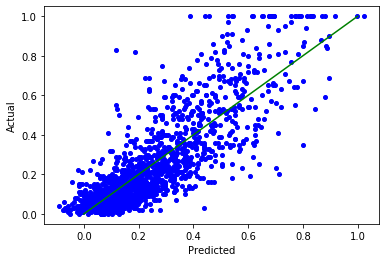

In [30]:
#Plotting correlation between predicted and actual training target variable
%matplotlib inline
pl.plot(p_train, Y_train,'bo', markersize=4)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [31]:
#Plotting the regression wieghts
%matplotlib inline
def plot_coefficients(model, n_features, feature_names):
    pl.barh(range(n_features), model.coef_, align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

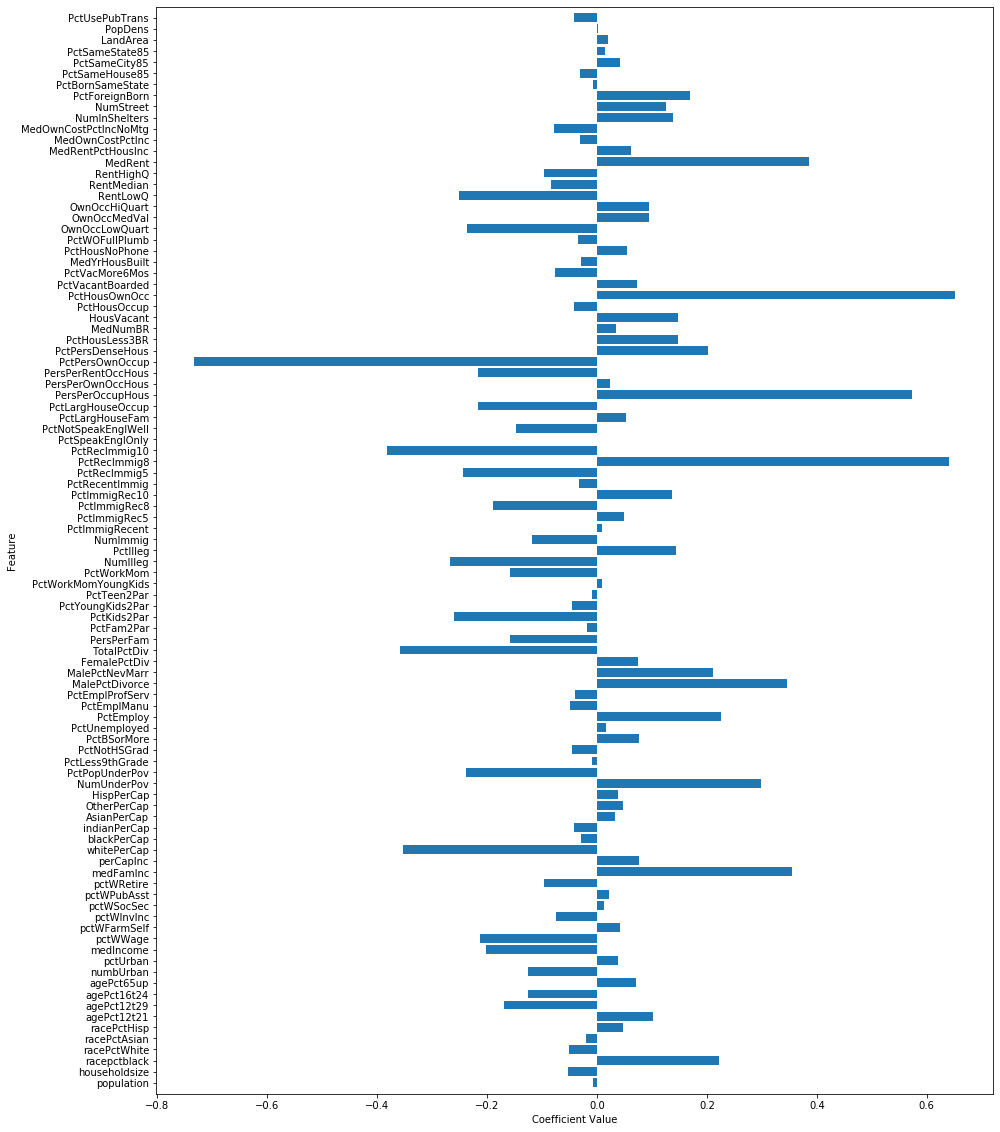

In [32]:
#Plotting the coefficients
plt.figure(figsize=(15,20))

plot_coefficients(linreg, len(train.columns), train.columns)

In [33]:
# Performing the 10 fold cross-validation 
from sklearn.model_selection import cross_val_score

In [34]:
cv_scores = cross_val_score(linreg, X_train, Y_train, scoring ="neg_mean_squared_error", cv=10)
print(np.sqrt(abs(cv_scores)))
cv_rmse = np.mean(np.sqrt(abs(cv_scores)))

[0.14373935 0.13848502 0.13298995 0.1360245  0.1351074  0.13231055
 0.11917148 0.12158482 0.13669634 0.14684537]


In [36]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training data: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %cv_rmse)

Method: Simple Linear Regression
RMSE on training data: 0.1262
RMSE on 10-fold CV: 0.1343


RMSE OF 10 FOLD IS GREATER WHCIH INDICATES THAT IT DOES NOT PERFORM WELL THAN THE OTHER

C.

[15 pts] Feature Selection:  use the scikit-learn to select the best subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data; target variable; the regression model; and any other parameters you find necessary. The function should return the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (use k=5 for consistency) and use feature_selection.SelectPercentile to find the most informative variables for a range of percentile values [Note: since this is regression not classification, in the SelectPercentile function you should use feature_selection.f_regression as scoring function rather than chi2). You should also plot the model's error values on cross-validation using only the selected features across the range of percentile values. For variety, in this part we will use Mean Absolute Error (MAE) as the error metric instead of RMSE. For cross-validation, use scikit's cross_val_score function. In order to use cross_val_score with regression you'll need to pass to it a specific error function. In this case, you will use scoring='neg_mean_absolute_error' as a parameter. You should use aboslute values to convert these negated MAE values to positive MAE values. Your plot should look similar (but won't be exactly the same as this example). Once you have identified the best percentile based on cross-validation, use it to identify and display the corresponding best features. As a final step, train your model on the full 80% training data with the optimal subset of features and then compute it's peformance (again using MAE) on the set-aside 20% test partition

In [37]:
#Univariate linear regression tests returning F-statistic and p-value
from sklearn import feature_selection

In [38]:
from sklearn.feature_selection import f_regression, SelectPercentile
import math

In [39]:
f_select = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 20)
X_train_fs = f_select.fit_transform(X_train, Y_train)
print(X_train_fs)

[[0.02 0.91 0.83 ... 0.83 0.   0.01]
 [0.59 0.44 0.44 ... 0.31 0.86 0.33]
 [0.02 0.95 0.75 ... 0.86 0.04 0.02]
 ...
 [0.23 0.76 0.77 ... 0.78 0.   0.03]
 [0.09 0.77 0.42 ... 0.24 0.04 0.06]
 [1.   0.   0.37 ... 0.23 1.   0.25]]


1 0.11287401163402824
6 0.09943268475677308
11 0.09900510519125441
16 0.0990905907952681
21 0.0975068622131086
26 0.09608904536542377
31 0.09478480270197638
36 0.09474955355002232
41 0.094353704288577
46 0.09466441760571029
51 0.09498773346781052
56 0.09532085164805934
61 0.09574966889254499
66 0.09572089544915723
71 0.09583132229767208
76 0.09519157369784723
81 0.0954256882753639
86 0.09513624310358185
91 0.09525366581598069
96 0.09527627852883913
Optimal percentile of features:41

optimal_percent :  [8]  Optimal number of features:39 



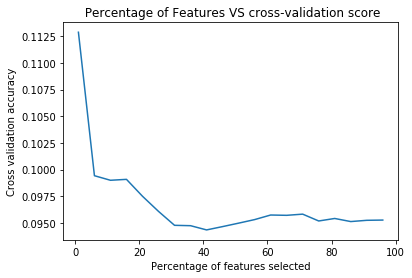

In [41]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 


linreg = LinearRegression()
percentiles = range(1, 100, 5)
scorer ='neg_mean_absolute_error'
N =5

def optimal_num_features(model, X_train, Y_train, N, percentile, scorer):
    results = []

    for i in percentiles:
        fs = SelectPercentile(f_regression, percentile=i)
        X_train_fs = fs.fit_transform(X_train, Y_train)
        scores = abs(cross_val_score(model, X_train_fs, Y_train, cv=N, scoring = scorer))
        print (i, scores.mean())
        results = np.append(results, scores.mean())

    optimal_percentile = np.where(results == results.min())[0]
    print ("Optimal percentile of features:{0}".format(percentiles[int(optimal_percentile)]))
    return optimal_percentile, results

optimal_percent, results = optimal_num_features(linreg,X_train,Y_train,N,percentiles,scorer)

optimal_num_features = int(math.floor(percentiles[int(optimal_percent)]*X_train.shape[1])/100)
print ("\noptimal_percent : ",optimal_percent," Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.title(" Percentage of Features VS cross-validation score")
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)


In [44]:
print("optimal_percent ",percentiles[int(optimal_percent)])
print()
fs = SelectPercentile(f_regression,percentile=percentiles[int(optimal_percent)])
X_train_fs = fs.fit_transform(X_train,Y_train)

for i in range(len(X_train.columns.values)):
    if fs.get_support()[i]:
        print (X_train.columns.values[i], '\t', fs.scores_[i])

optimal_percent  41

population 	 256.0323547372104
racepctblack 	 1074.8895092675332
racePctWhite 	 1412.507812392418
numbUrban 	 247.77613854814712
medIncome 	 341.6325375231915
pctWWage 	 161.57075094157048
pctWInvInc 	 756.0149723312642
pctWPubAsst 	 784.5706408092445
medFamInc 	 366.9004218440599
perCapInc 	 214.9931579906875
NumUnderPov 	 400.30785689079215
PctPopUnderPov 	 578.8173652137692
PctLess9thGrade 	 319.21810810192335
PctNotHSGrad 	 472.1962078690574
PctBSorMore 	 173.3668431842841
PctUnemployed 	 533.9131521991873
PctEmploy 	 190.46526246383505
MalePctDivorce 	 602.7748935816096
FemalePctDiv 	 704.7727390048349
TotalPctDiv 	 693.1378303822019
PctFam2Par 	 1657.8650169981222
PctKids2Par 	 1972.8040638663977
PctYoungKids2Par 	 1342.1736137875287
PctTeen2Par 	 1299.5351058426954
NumIlleg 	 431.63556026914017
PctIlleg 	 1936.1208737826912
PctLargHouseFam 	 241.2338163602986
PctPersOwnOccup 	 630.760339373983
PctPersDenseHous 	 375.64590187612174
PctHousLess3BR 	 487.961680

Optimal percentile of features:41

optimal_percent :  [8]  Optimal number of features:39 

In [45]:
#calculating the Mean Absolute Error(MAE)
fs = SelectPercentile(f_regression, optimal_percent)
X_train_fs = fs.fit_transform(X_train, Y_train)
linreg = LinearRegression()
linreg.fit(X_train_fs, Y_train)
X_test_fs = fs.transform(X_test)

predict = linreg.predict(X_test_fs)

score = mean_squared_error(Y_test,predict )
print("MAE score for test data on cv: {}".format(abs(score).mean()))

MAE score for test data on cv: 0.02407671773153772


D.


[10 pts] Next, using the original train and test data in part (a), perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha hyperparameter (the regularization coefficient). You should create a function that takes as input the training data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values (this time using RMSE as the error metric) on the training and cross-validation splits across the specified values of alpha. Finally, using the best alpha values for each regression model, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observations and conclusions, especially about the impact of alpha on bias-variance trade-off. [Hint: for an example of a similar model optimization process please review the class example notebook.]

In [47]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [48]:
def calc_params(Data, y, model, param_values, param_name, K, verbose, model_name):
    
    # Convert input to Numpy arrays
    Data = np.array(Data)
    y = np.array(y)
    
    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for train, test in cv.split(Data):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            model.fit(Data[train], y[train])
            
            train_predict = model.predict(Data[train])
            test_predict = model.predict(Data[test])
            
            k_train_scores = np.sqrt(mean_squared_error(y[train], train_predict))
            k_test_scores = np.sqrt(mean_squared_error(y[test], test_predict))

        
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    fig = plt.figure(figsize=(15,10))
    
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='Test', alpha=0.4, lw=2, c='g')
    plt.title(model_name)
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Cross validation RMSE")

    min_err_idx = np.where(test_scores == test_scores.min())
    min_err_alpha = param_values[min_err_idx]
    
    ##print ('The minimum MAE using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])
    
    # return the training and testing scores on each parameter value
    return train_scores, test_scores, min_err_alpha,min_err_idx

 train shape  (1595, 97)  y-train shape  (1595,)


 The RMSE for " Ridge " using cross validation is: 0.1388211089592544 with alpha : 1.0060150753768842


 The RMSE for " Lasso " using cross validation is: 0.14224582056412474 with alpha : 0.001


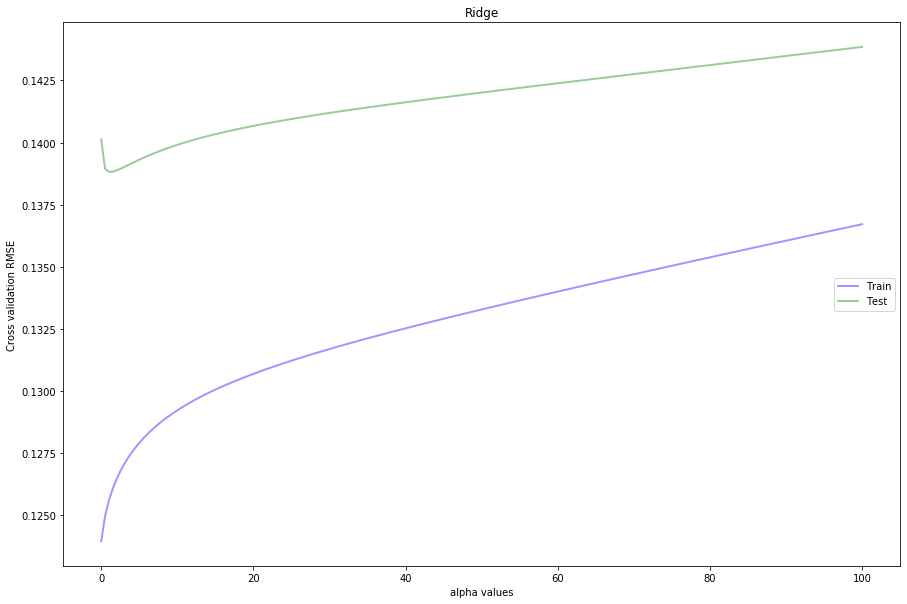

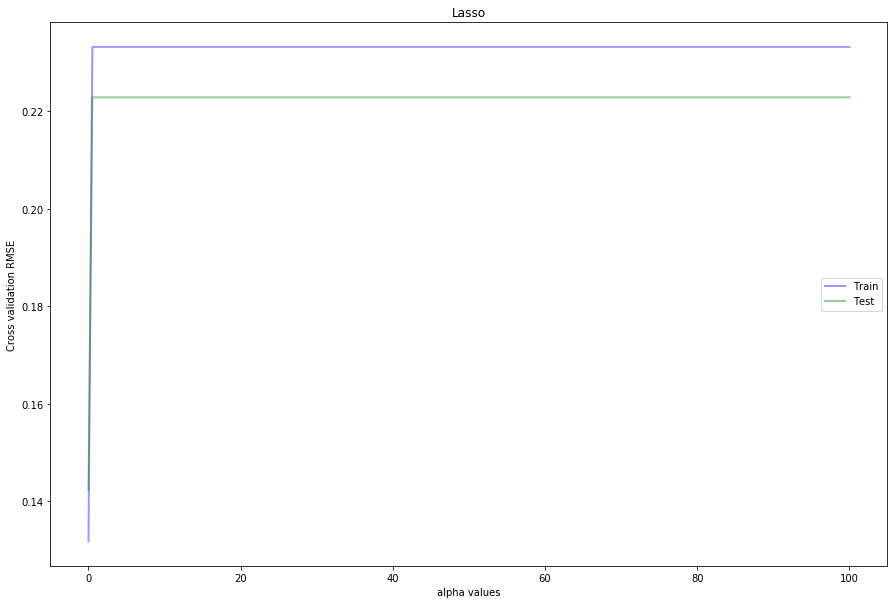

In [50]:
print(' train shape ',X_train.shape,' y-train shape ',Y_train.shape)

alpha = np.linspace(0.001, 100, 200)
alpha = np.array([float(e) for e in alpha])

number_of_fold = 5
param_name = 'alpha'
param_values = alpha
verbose = False

models = {'Ridge': Ridge(),'Lasso':Lasso()}
min_alpha = {}
for key in models.keys():
    
    train_scores, test_scores, min_err_alpha,min_err_idx = calc_params(X_train, Y_train, models.get(key), param_values, param_name, number_of_fold,verbose,key)
    
    print ('\n\n The RMSE for \"',key,'\" using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])
    min_alpha[key]=min_err_alpha[0]

In [51]:
# Running the models on Test"
model = None
for key in min_alpha.keys():
    if(key=='Ridge'):
        model = Ridge(fit_intercept=True, alpha=min_alpha.get(key))
        model.fit(X_train, Y_train)    
       
    else :
        model = Lasso(fit_intercept=True, alpha=min_alpha.get(key))
        model.fit(X_train, Y_train)    
        
      
    pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(Y_test, pred))
    print(key,' => Root Mean Squared error on test data: %0.8f' % RMSE, 'using alpha =',min_alpha.get(key))

Ridge  => Root Mean Squared error on test data: 0.14337675 using alpha = 1.0060150753768842
Lasso  => Root Mean Squared error on test data: 0.14601641 using alpha = 0.001


E.

[10 pts] Next, perform regression using Stochastic Gradient Descent Regressor from scikit-learn (again use the original train-test split in part (a). Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search). Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, train the model on the full training partition and apply the model to the set-aside test data, comparing traning and test RMSE scores. Finally, perform model optimization (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model, trained on full training data, to the set-aside test data and compare to the training perfromance. Provide a brief summary of your findings from the above experiments

In [52]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [55]:
print('Original data Shape',community_data.shape)

new_data = np.array(community_data.drop(['state','communityname','ViolentCrimesPerPop'],axis=1,inplace=False))

# Standardize the data
scaler = StandardScaler()
scaler.fit(new_data)
new_data = scaler.transform(new_data)


new_train, new_test, new_target_train, new_target_test = train_test_split(new_data, community_data.ViolentCrimesPerPop, test_size=0.2, random_state=33)

print("new_train shape ",new_train.shape, " test shape ",new_test.shape)

print("train target shape ",new_target_train.shape," Test target shape ",new_target_test.shape)

x_train = np.array(new_train)
y_train = np.array(new_target_train)

x_test = np.array(new_test)
y_test = np.array(new_target_test)

Original data Shape (1994, 100)
new_train shape  (1595, 97)  test shape  (399, 97)
train target shape  (1595,)  Test target shape  (399,)


In [56]:
sgdreg = SGDRegressor();

alpha = np.linspace(.0001,10,100)
alpha = np.array([float(e) for e in alpha])

parameters = {
    'penalty':["l2","l1"],
    'alpha':alpha
}
gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

In [57]:
%time _ = gs.fit(X_train, Y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 8.22 s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.1s finished


({'alpha': 0.0001, 'penalty': 'l1'}, 0.6419710602837586)

In [58]:
# Using the best parameters, apply the model to the set-aside test data
sgd = SGDRegressor()

val = ""
for (i, j) in gs.best_params_.items():
    sgd.set_params(**{i:j})
    print ("The optimum value of", i, "is estimated as", j)
    val += str(i) + "=" + str(j) + " "
    print("\n")
    
sgd.fit(X_train, Y_train)
pred = sgd.predict(X_test)
RMSE = np.sqrt(mean_absolute_error(Y_test, pred))

print ('RMSE on set-aside test data set: %0.8f' % RMSE, "with",val)

The optimum value of alpha is estimated as 0.0001


The optimum value of penalty is estimated as l1


RMSE on set-aside test data set: 0.32088795 with alpha=0.0001 penalty=l1 




 The minimum RMSE for "SGDRegressor" using cross validation is: 0.14363418817880969 with l1_ratio : 0.6465


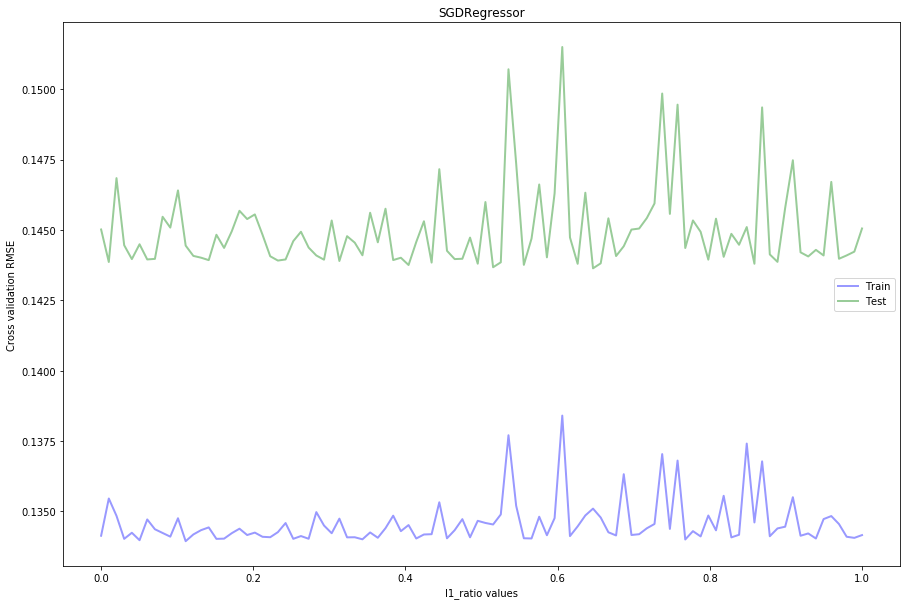

In [59]:
l1_ratio_range = np.linspace(0.0001,1, 100)
param_name = "l1_ratio" 
param_value = l1_ratio_range
verbose=False

model = SGDRegressor(penalty='elasticnet')

train_scores, test_scores, min_err_alpha,min_err_idx = calc_params(X_train, Y_train,model, param_value, param_name, 5, verbose, "SGDRegressor")
    
print ('\n\n The minimum RMSE for \"SGDRegressor\" using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])

From above output, we can say that the l1_ratio value of 0.4141 gives the lowest RMSE on training data (0.137 ). So, we will use that to run the model on set aside test data with "elasticnet" as the penalty parameter.

In [60]:
# Using the best parameters, apply the model to the set-aside test data
sgd = SGDRegressor(penalty='elasticnet', l1_ratio=min_err_alpha[0])
sgd.fit(X_train, Y_train)
pred = sgd.predict(X_test)
MAE = np.sqrt(mean_absolute_error(Y_test, pred))

print ('MAE on set-aside test data set: %0.8f' % MAE, "with penalty equals to 'elasticnet' and l1_ratio = ",min_err_alpha[0])

MAE on set-aside test data set: 0.32163126 with penalty equals to 'elasticnet' and l1_ratio =  0.6465


RMSE FOR TRAIN DATA

Ridge ==> 0.1388
Lasso ==> 0.1422
SGB ==> 0.1437

------------------------------------------------

RMSE FOR TEST DATA

Ridge ==> 0.1433
Lasso ==> 0.146
SGB ==> 0.3217

# QUESTION 2

A.

[5 pts] Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function in the included module. Note: you should not use external function for computing Cosine. Write your own version that computes Cosine similarity between two n-dimentional vectors and returns the inverse as the distance between these vectors.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def calculateEuclideanDistance(x,D):
    dist = np.sqrt((D -x)**2).sum(axis=1)
    return dist

def calculateCosineSimilarityDistance(x,D):
    
    D_norm = np.linalg.norm(D) #np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    #print("D_norm ",D_norm," x_norm ",x_norm)
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dist = 1 - sims
    
    return dist

B.

[10 pts] Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, use the train_test_split function (with random_state = 99) to perform a randomized split the data set (the document by term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. Next, as in the previous assignment, perform TFxIDF transformation on these data sets. [Note: if you have difficulty with TFxIDF conversion, then use the original non-transformed data for the remainder of this assignment].

In [11]:
# Loading the datasets
matrix = pd.read_table("D:/DEPAUL MS DATA SCIENCE/DSC 478 Programming Machine learning/ASSIGNMENT 3/newsgroups5/matrix.txt",delimiter=',',header=None)
terms = pd.read_table("D:/DEPAUL MS DATA SCIENCE/DSC 478 Programming Machine learning/ASSIGNMENT 3/newsgroups5/terms.txt",delimiter=',',header=None)
classes = np.genfromtxt("D:/DEPAUL MS DATA SCIENCE/DSC 478 Programming Machine learning/ASSIGNMENT 3/newsgroups5//classes.txt",delimiter=' ', dtype=int, skip_header=1, usecols=(1))

In [12]:
matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
terms.head()

,0
0,aa
1,aargh
2,aaron
3,aaronc
4,ab


In [14]:
classes

array([0, 1, 1, ..., 3, 4, 2])

In [15]:
matrix.shape

(9328, 2500)

In [16]:
matrixT = matrix.T
matrixT.shape

(2500, 9328)

In [17]:
DTmatrix = np.mat(matrixT)
DTmatrix.shape

(2500, 9328)

In [18]:
terms.shape

(9328, 1)

In [19]:
classes.shape

(2500,)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, ytest = train_test_split(matrixT, classes, test_size=0.2, random_state=99)

In [21]:
print("train : ",x_train.shape)
print("Test : ",x_test.shape)

train :  (2000, 9328)
Test :  (500, 9328)


C.


[20 pts] Perform Kmeans clustering on the transformed training data from part (b) Perform a qualitative analysis of the clusters by examining top features in each cluster and identifying patterns in the data. To facilitate your analysis of the clusters, write a function to display the top N terms in each cluster sorted by decreasing centroid weights for each term in the cluster (mean TFxIDF frequency of the term). Your output should also display the cluster DF value for the top N terms. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). For each cluster, you should also display the cluster size (the nunber of documents in the cluster). Here is an example of how this output might look like (here the top 10 terms for a sample of clusters are displayed in decreasing order of mean TFxIDF weights from the cluster centroids (the "Freq" column), but in addition the cluster DF values (both raw and as a percentage) are also shown).

In [22]:
## get random centroids
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k)
    return centroids

In [25]:
def kmeans(D,k,distMeas= calculateCosineSimilarityDistance,createCentroid = randCent):
    m = np.shape(D)[0]
    
    ## cluster assignment matrix with 2 cols. one for cluster index and 2nd one for cluster error (distance from cluster centroid to the current point)
    clusterAssment = np.mat(np.zeros((m,2)))
    
    print('calculating centroids : Start')
    centroids = createCentroid(D,k)
    print('calculating centroids : End','\n centroids are :: \n',centroids)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        ## loop over data points and assign assign it to the closest centroid
        for i in range(m):
            minDIst = np.inf;
            minIndex = -1;
            for j in range(k):
                distJI = distMeas(centroids[j,:],D[i,:])
    
                if(distJI < minDIst):
                    minDIst = distJI;
                    minIndex = j;
            if clusterAssment[i,0] !=minIndex : clusterChanged = True
            clusterAssment[i,:] = minIndex, minDIst**2
        
        ## update the centroid
        for cent in range(k):
            ptsInClust = D[np.nonzero(clusterAssment[:,0] == cent)[0]]
            centroids[cent,:] = np.mean(ptsInClust,axis=0)
    return centroids, clusterAssment

In [26]:
%%time
data = np.mat(x_train)
centroids, clusterAssment = kmeans(data,5)

calculating centroids : Start
calculating centroids : End 
 centroids are :: 
 [[5.83442057e-01 9.89087700e-02 3.86504510e+01 ... 4.07351964e-01
  3.46459262e-01 1.44694089e+00]
 [1.68332438e-01 3.51402142e-01 2.08182815e+01 ... 1.14324965e+00
  5.36568864e-01 2.93262828e+00]
 [6.86813407e-01 3.97675133e-01 4.58219134e+01 ... 4.58333202e-02
  2.48472633e-02 2.45759099e+00]
 [3.45263847e-02 7.73611139e-02 3.23023310e+01 ... 1.12316118e+00
  3.11048765e-01 4.56083593e+00]
 [5.32521057e-01 3.63360123e-01 2.54725653e+01 ... 1.73677317e-01
  1.36002962e-01 7.40078358e-01]]


C:\Users\razia\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\Users\razia\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\razia\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


Wall time: 3min 9s


In [27]:
print(" centroids shape",centroids.shape)
print(" clusterAssment shape ",clusterAssment.shape)

 centroids shape (5, 9328)
 clusterAssment shape  (2000, 2)


In [28]:
def cluster_report(data,terms, clusters, centroids):
    clustersDF = pd.DataFrame(clusters)
    term_list = pd.Series(terms[0], name='Term')
    
    cluster_labels = np.unique(clustersDF[0])
    result = {}
    size ={}
    for c in cluster_labels:
        c = int(c)
        print(c)
        ## get the index of the train data from cluster c
        cl_data = x_train.index[clustersDF[0]==c]

        # gen centroids/frequency for the current (ith) cluster
        centroid = pd.Series(centroids[c], name='Freq')

        cl_size = len(cl_data)
        size[c] = cl_size
        
        ## doc by term
        docs_from_cluster = x_train[x_train.index.isin(cl_data)]

        ## term by doc
        docs_from_cluster = docs_from_cluster.T

        ## count all non zero terms
        DF = (pd.DataFrame([(docs_from_cluster!=0).sum(1)]).T)

        ## if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, 
        ##then DF value of "game" in that cluster is 0.2 or 20%
        DF = DF / size[c]
        ## divide each term count by number of docs in cluser
        
        DF.columns=['DF']
        
        DF_PERCENT = DF.copy()
        DF_PERCENT = DF_PERCENT * 100
        DF_PERCENT.columns=['% of Docs']
        ##print("docs_from_cluster \n",docs_from_cluster)

        ## concatenate the terms, centroid and DF values for the cluster
        term_centroid = pd.concat([term_list, centroid,DF,DF_PERCENT],axis=1)
        
        result[c] = term_centroid
    return result , size

In [29]:
def display_clusters(clusterDict, clusterSize, numTerms):
    for c in clusterDict.keys():
        cluster_rep = clusterDict[c]
        print("\nCluster ", c, "size =", clusterSize[c])
        print("----------------------------------------------")
        print(cluster_rep.sort_values(by="DF", ascending=False).head(numTerms))
    return

In [30]:
x_train = pd.DataFrame(x_train)
clusterDict_nonidf , clusterSize_nonidf = cluster_report(x_train,terms,clusterAssment,centroids)
print(clusterDict_nonidf.keys())

print("\ncluster# :: # of docs")
for key in clusterSize_nonidf.keys():
      print(key," \t :: ",clusterSize_nonidf[key])

0
1
2
4
dict_keys([0, 1, 2, 4])

cluster# :: # of docs
0  	 ::  354
1  	 ::  5
2  	 ::  505
4  	 ::  1136


In [31]:
numOfTopNTerms = 10
display_clusters(clusterDict_nonidf,clusterSize_nonidf,numOfTopNTerms)


Cluster  0 size = 354
----------------------------------------------
         Term      Freq        DF   % of Docs
7895  subject  1.073446  1.000000  100.000000
9025   window  2.505650  0.799435   79.943503
9129    write  0.629944  0.463277   46.327684
2933     file  1.587571  0.437853   43.785311
2296       do  1.036723  0.347458   34.745763
5795       on  0.559322  0.338983   33.898305
4449     know  0.488701  0.336158   33.615819
8174    thank  0.350282  0.333333   33.333333
7063      run  0.666667  0.330508   33.050847
9084     work  0.559322  0.327684   32.768362

Cluster  1 size = 5
----------------------------------------------
       Term  Freq   DF  % of Docs
443    asqq   5.0  1.0      100.0
2508     ei   8.2  1.0      100.0
3317   gkwt   3.2  1.0      100.0
744     bhj   4.6  1.0      100.0
1420  cliff   1.0  1.0      100.0
5680   nriz   4.0  1.0      100.0
5428    mwt   3.8  1.0      100.0
3385     gp   4.6  1.0      100.0
4835     ma   7.0  1.0      100.0
5426     mw  10.

In [32]:
## Repeating the above with DT_IDF
termFreqs = matrix.sum(axis=1).astype(np.int64)
termFreqs.shape

(9328,)

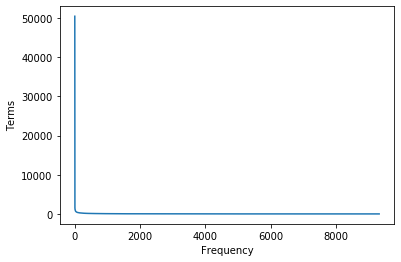

In [33]:
plt.plot(sorted(termFreqs, reverse=True))
plt.xlabel('Frequency')
plt.ylabel('Terms')
plt.show()

In [34]:
print("TD ", matrix.shape)
DTmatrix = matrix.T
print("DT ",DTmatrix.shape)

TD  (9328, 2500)
DT  (2500, 9328)


In [35]:
numTerms=DTmatrix.shape[1]
NDocs = DTmatrix.shape[0]
TDmatrix = matrix
print("numTerms ",numTerms," NDocs ",NDocs)

# Note: doc frequency (df) for a term t is the number of docs in which t appears divided by total number of docs

# first let's find the doc counts for each term

DF = pd.DataFrame([(TDmatrix!=0).sum(1)]).T
print(DF.shape)

# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(TDmatrix), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, np.array(DF)))

np.set_printoptions(precision=2,suppress=True)
print(IDF)

pd.set_option("display.precision", 2)

# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = TDmatrix * IDF

print("TD_tfidf",TD_tfidf)

DT_tfidf = TD_tfidf.T
DT_tfidf = np.mat(DT_tfidf)

print("DT_tfidf.shape :",DT_tfidf.shape)


numTerms  9328  NDocs  2500
(9328, 1)
[[2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 ...
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]]
[[7.97 7.97 7.97 ... 7.97 7.97 7.97]
 [8.7  8.7  8.7  ... 8.7  8.7  8.7 ]
 [6.83 6.83 6.83 ... 6.83 6.83 6.83]
 ...
 [9.7  9.7  9.7  ... 9.7  9.7  9.7 ]
 [9.7  9.7  9.7  ... 9.7  9.7  9.7 ]
 [9.29 9.29 9.29 ... 9.29 9.29 9.29]]
TD_tfidf       0     1     2     3     4     5     6     7     8     9     ...  2490  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

In [36]:
x_train_df, x_test_idf, y_train_idf, y_test_idf = train_test_split(DT_tfidf, classes, test_size=0.2, random_state=99)

In [37]:
data = np.mat(x_train_df)
centroids, clusterAssment = kmeans(data,5)

print(" clusterAssment : ",clusterAssment.shape)
print(" centroids : ",centroids.shape)

calculating centroids : Start
calculating centroids : End 
 centroids are :: 
 [[  0.23   3.36 298.78 ...   0.37   5.07  37.13]
 [  5.33   0.73  40.2  ...   1.87   3.26  33.14]
 [  4.82   0.67  95.18 ...   5.89   8.32  32.51]
 [  2.39   6.65 267.68 ...  10.32   5.22  46.04]
 [  7.43   5.41 141.7  ...   2.87   7.79  20.98]]


C:\Users\razia\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


 clusterAssment :  (2000, 2)
 centroids :  (5, 9328)


In [38]:
centroids

array([[0.  , 0.  , 0.  , ..., 1.39, 0.  , 0.  ],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [0.03, 0.03, 0.27, ..., 0.01, 0.01, 0.05],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [39]:
x_train_df = pd.DataFrame(x_train_df)
clusterDict , clusterSize = cluster_report(x_train_df,terms,clusterAssment,centroids)
print(clusterDict.keys())

print("\ncluster# :: # of docs")
for key in clusterSize.keys():
      print(key," \t :: ",clusterSize[key])

0
2
3
dict_keys([0, 2, 3])

cluster# :: # of docs
0  	 ::  7
2  	 ::  1967
3  	 ::  26


In [40]:
numOfTopNTerms = 10
display_clusters(clusterDict,clusterSize,numOfTopNTerms)


Cluster  0 size = 7
----------------------------------------------
         Term      Freq    DF  % of Docs
7895  subject      0.00  1.00     100.00
547        ax  41371.61  0.86      85.71
4982      max   2826.98  0.86      85.71
9144       wt     41.19  0.71      71.43
6183       pl    296.54  0.71      71.43
8275       tm     51.71  0.71      71.43
5238       ml     30.92  0.71      71.43
5975     part      4.59  0.71      71.43
3275    ghjkn     17.41  0.71      71.43
3279       gi     15.39  0.71      71.43

Cluster  2 size = 1967
----------------------------------------------
         Term  Freq    DF  % of Docs
7895  subject  0.00  1.00     100.00
9129    write  0.69  0.48      48.20
5795       on  1.05  0.40      39.50
417    articl  0.69  0.36      35.99
4449     know  0.87  0.30      29.74
3266      get  0.89  0.29      29.49
4319     just  0.79  0.28      28.22
8203    think  0.79  0.24      24.40
8255     time  0.80  0.23      23.08
3339       go  0.80  0.22      21.56

Cl

D.

[5 pts] Using the cluster assignments from your Kmeans clustering and the original cluster labels for the training document, compare your clusters to the re-assigned classes by computing the Completeness and Homogeneity values. You should do this for the best values of k and the best clustering run you settled on in the previous part

In [41]:
y_train_idf

array([1, 0, 0, ..., 3, 1, 0])

In [42]:
clusterAssment.T[0]

matrix([[2., 2., 2., ..., 2., 2., 2.]])

In [43]:
from sklearn.metrics import completeness_score, homogeneity_score

#NOTE: this generates a random score every time you run the cluster
print("completeness_score = ",completeness_score(y_train_idf,np.ravel(clusterAssment.T[0])))
print("homogeneity_score = ",homogeneity_score(y_train_idf,np.ravel(clusterAssment.T[0])))

completeness_score =  0.22211027922487894
homogeneity_score =  0.012781324399281646


E.

[10 pts] Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate clusters (using your final clustering results in part c). Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the assigned cluster label as well as Cosine similarity to the corresponding cluster.

In [44]:
print(centroids.shape)
print(centroids)
print("vs_test_idf shape ",x_test_idf.shape)

(5, 9328)
[[0.   0.   0.   ... 1.39 0.   0.  ]
 [ nan  nan  nan ...  nan  nan  nan]
 [0.03 0.03 0.27 ... 0.01 0.01 0.05]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [ nan  nan  nan ...  nan  nan  nan]]
vs_test_idf shape  (500, 9328)


In [45]:
results = []

x_test = np.array(x_test_idf)
for doc in x_test:
    dic = {}
    sim = []
    cluster = 0
    for centroid in centroids:
        val = np.ravel(calculateCosineSimilarityDistance(doc,centroid))[0]
        centroid_doc_sim = 1 - val #Need to subtract from 1 as our function returns distance and not similarity
        #print("centroid_doc_sim ",centroid_doc_sim)
        sim.append(centroid_doc_sim) 
        dic['Cosine Similarity to Cluster '+str(cluster)] = str(np.ravel(centroid_doc_sim)[0])
        cluster += 1
        
    dic['Predicted Cluster'] = sim.index(max(sim)) 
    
    results.append(dic)

test_cluster = pd.DataFrame(results)

In [46]:
pd.options.display.max_rows = 50
print("Categorized test data shape ",test_cluster.shape)

test_cluster

Categorized test data shape  (500, 6)


,Cosine Similarity to Cluster 0,Cosine Similarity to Cluster 1,Cosine Similarity to Cluster 2,Cosine Similarity to Cluster 3,Cosine Similarity to Cluster 4,Predicted Cluster
0,4.5583202166188386e-06,nan,0.1763707070454703,0.01375277656698004,nan,2
1,0.0,nan,0.10411406895945108,0.0139558234318784,nan,2
2,3.501293787033788e-05,nan,0.13244807056448837,0.006756922478133642,nan,2
3,3.934667201721531e-06,nan,0.060113302434285254,0.003052568244018339,nan,2
4,5.661633320164228e-06,nan,0.1989123427197792,0.01974662329260468,nan,2
...,...,...,...,...,...,...
495,0.0,nan,0.11168157179985272,0.006488193301328993,nan,2
496,1.0737448201236788e-05,nan,0.09872704568950108,0.06421381260321413,nan,2
497,6.75703351453727e-05,nan,0.07484809757498778,0.009482801446690003,nan,2
498,1.986801586029152e-06,nan,0.10901747414510232,0.004324369870419176,nan,2
